In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [6]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=12)

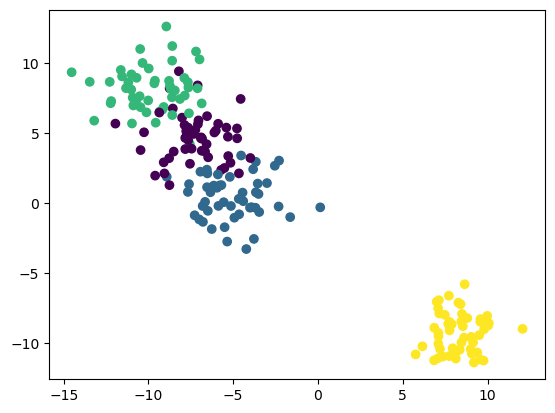

In [7]:
X = data[0][:,0]
y = data[0][:,1]

plt.scatter(X,y,c=data[1],cmap="viridis")

In [8]:
def kmeans_clustering(X, k, max_iterations=100):
    centroids = X[np.random.choice(len(X),k, replace=False)]

    for _ in range(max_iterations):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [9]:
K = 4
labels, centroids = kmeans_clustering(data[0], K)

In [10]:
print(labels)

[1 3 0 2 1 2 1 1 2 3 3 0 2 2 0 1 3 3 1 1 2 0 0 0 0 0 0 0 1 3 3 2 1 1 2 0 3
 0 2 3 3 3 1 2 2 1 3 3 1 2 1 3 1 2 2 3 0 3 3 3 0 1 3 2 2 2 1 0 2 0 0 1 0 2
 2 0 1 1 3 3 3 1 2 2 0 3 0 1 1 0 1 3 3 1 3 1 1 2 3 3 1 1 0 2 3 1 3 1 0 2 0
 3 2 3 2 2 1 1 2 1 0 0 3 0 1 3 3 3 0 0 2 0 2 3 0 3 1 1 3 2 2 1 2 2 3 0 3 3
 3 2 2 2 3 0 0 1 0 1 3 3 2 1 3 3 0 1 3 1 0 2 0 3 1 2 2 3 0 1 0 1 0 3 2 0 2
 2 1 0 2 0 2 1 1 0 0 2 1 3 2 3]


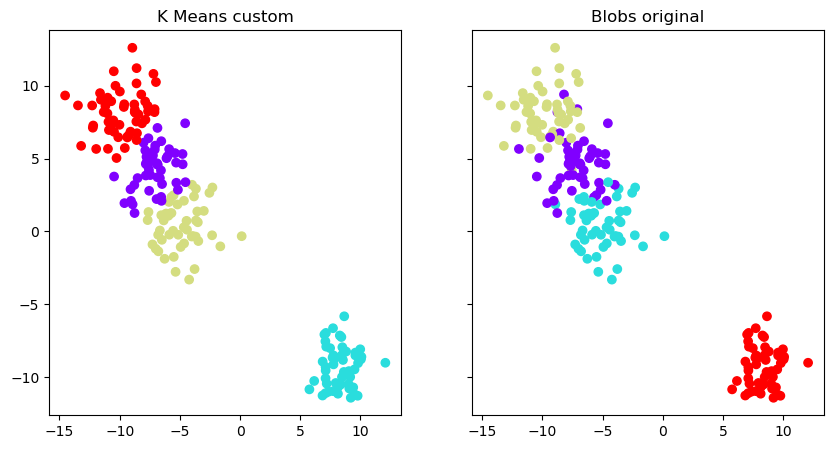

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax1.set_title("K Means custom")
ax1.scatter(data[0][:,0], data[0][:,1], c=labels, cmap="rainbow")
ax2.set_title("Blobs original")
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap="rainbow")

In [13]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(data[0])

/Users/felipepesantez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
k_centers = kmeans_model.cluster_centers_
k_centers

array([[ 8.30237472, -9.27924372],
       [-7.20846818,  4.36738859],
       [-4.93290182,  0.45207021],
       [-9.82590552,  8.17891092]])

In [15]:
kmeans_model.labels_

array([0, 3, 1, 2, 0, 2, 0, 0, 2, 3, 3, 1, 2, 2, 1, 0, 3, 3, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 3, 3, 2, 0, 0, 2, 1, 3, 1, 2, 3, 3, 3, 0, 2,
       2, 0, 3, 3, 0, 2, 0, 3, 0, 2, 2, 3, 1, 3, 3, 3, 1, 0, 3, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 3, 3, 3, 0, 2, 2, 1, 3, 1, 0,
       0, 1, 0, 3, 3, 0, 3, 0, 0, 2, 3, 3, 0, 0, 1, 2, 3, 0, 3, 0, 1, 2,
       1, 3, 2, 3, 2, 2, 0, 0, 2, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 2, 1,
       2, 3, 1, 3, 0, 0, 3, 2, 2, 0, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 1,
       1, 0, 1, 0, 3, 3, 2, 0, 3, 3, 1, 0, 3, 0, 1, 2, 1, 1, 0, 2, 2, 3,
       2, 0, 2, 0, 1, 3, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 3,
       2, 3], dtype=int32)

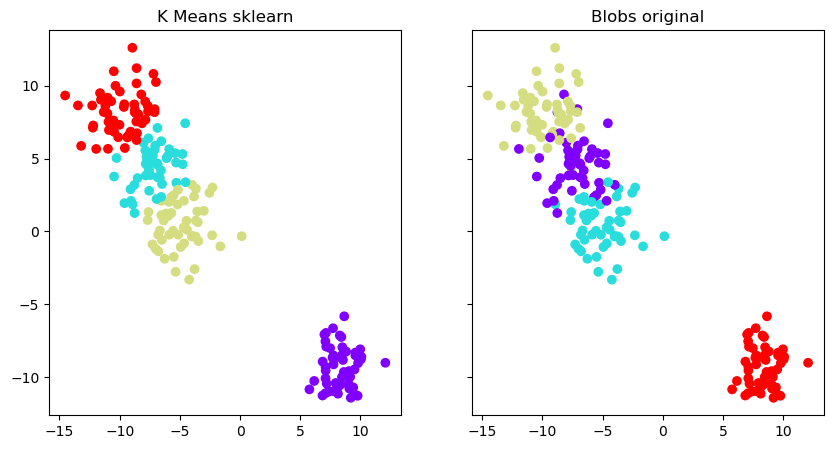

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax1.set_title("K Means sklearn")
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans_model.labels_, cmap="rainbow")
ax2.set_title("Blobs original")
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap="rainbow")